In [1]:
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img
# from keras.preprocessing.image import ImageDataGenerator, load_ig, img_to_array
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
%matplotlib inline

In [2]:
data_dir = Path("Dataset/Curve_NoCurve_Dataset/Curve_NoCurve_Dataset/")

train_data_curve = data_dir/"train/curve"
train_data_nocurve = data_dir/"train/no_curve"

test_data_curve = data_dir/"test/curve"
test_data_nocurve = data_dir/"test/no_curve"

test_hurricane = data_dir/"test/hurr"

In [3]:
def train_data_with_label(pathh):
    train_images = []
    
    for i in tqdm(os.listdir(pathh)):
        path = os.path.join(pathh, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         img = cv2.resize(img, (256, 256) )
        train_images.append([np.array(img)])
        
    shuffle(train_images)
    return train_images

In [4]:
def test_data_with_label(pathh):
    test_images = []
    
    for i in tqdm(os.listdir(pathh)):
        path = os.path.join(pathh, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         img = cv2.resize(img, (256, 256))
        test_images.append([np.array(img)])

    return test_images

In [5]:
## Training Images
train_images1 = train_data_with_label(train_data_curve)
train_images2 = train_data_with_label(train_data_nocurve)
train_image = np.append(train_images1, train_images2)
train_image = train_image.reshape(-1,256, 256, 1)

## Training Labels
label1 = np.ones(len(train_images1),dtype=np.int8) 
label2 = np.zeros(len(train_images2), dtype=np.int8)
train_label = np.append(label1, label2)

## Shuffling Dataset
c = list(zip(train_image, train_label))
shuffle(c)
train_image , train_label = zip(*c)
train_image = np.asarray(train_image)
train_label = np.asarray(train_label)

## Testing Images
test_images1 = test_data_with_label(test_data_curve)
test_images2 = test_data_with_label(test_data_nocurve)
test_image = np.append(test_images1, test_images2)
test_image = test_image.reshape(-1, 256, 256, 1)

## Testing Labels
label1 = np.ones(len(test_images1),dtype=np.int8) 
label2 = np.zeros(len(test_images2), dtype=np.int8)
test_label = np.append(label1, label2)

## Shuffling Dataset
d = list(zip(test_image, test_label))
shuffle(d)
test_image, test_label = zip(*d)
test_image = np.asarray(test_image)
test_label = np.asarray(test_label)



100%|████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<00:00, 1555.67it/s]


In [21]:
##  Hurricane Dataset
test_hurr = test_data_with_label(test_hurricane)
test_hurr = np.asarray(test_hurr)
test_hurr = test_hurr.reshape(-1, 256, 256, 1)

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 537.62it/s]


## One-Hot-Encoding Labels

In [7]:
trl = np.zeros((train_label.size, train_label.max() +1 ))
trl[np.arange(train_label.size), train_label] = 1 
train_label = trl

tel = np.zeros((test_label.size, test_label.max() + 1))
tel[np.arange(test_label.size), test_label] = 1
test_label = tel

In [8]:
print(trl)
print(tel)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1.

In [9]:
print("Train Image : ", train_image.shape)
print("Train Labels: ", train_label.shape)
print("Test Image  : ", test_image.shape)
print("Test Labels: ", test_label.shape)

Train Image :  (893, 256, 256, 1)
Train Labels:  (893, 2)
Test Image  :  (106, 256, 256, 1)
Test Labels:  (106, 2)


In [10]:
train_image[0].shape

(256, 256, 1)

In [11]:
model = Sequential()

model.add( InputLayer( input_shape=[256, 256, 1]))

model.add(Conv2D(filters=32, kernel_size=5, strides=1, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Conv2D(filters=80, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax')) # i changed this Dense 2 -> 1, and its not giving error of Dimensions not matching (900,1) with (900,2)

optimizer = Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(x=train_image, y=train_label, epochs=50, batch_size=100)


Epoch 1/50
9/9 [==============================] - 16s 2s/step - loss: 13.3306 - accuracy: 0.5610
Epoch 2/50
9/9 [==============================] - 14s 2s/step - loss: 1.3394 - accuracy: 0.6517
Epoch 3/50
9/9 [==============================] - 14s 2s/step - loss: 0.6473 - accuracy: 0.6920
Epoch 4/50
9/9 [==============================] - 14s 2s/step - loss: 0.4993 - accuracy: 0.7581
Epoch 5/50
9/9 [==============================] - 14s 2s/step - loss: 0.4206 - accuracy: 0.8264
Epoch 6/50
9/9 [==============================] - 14s 2s/step - loss: 0.3702 - accuracy: 0.8544
Epoch 7/50
9/9 [==============================] - 15s 2s/step - loss: 0.3305 - accuracy: 0.8701
Epoch 8/50
9/9 [==============================] - 14s 2s/step - loss: 0.2737 - accuracy: 0.9003
Epoch 9/50
9/9 [==============================] - 15s 2s/step - loss: 0.1885 - accuracy: 0.9295
Epoch 10/50
9/9 [==============================] - 16s 2s/step - loss: 0.1717 - accuracy: 0.9306
Epoch 11/50
9/9 [=====================

## Saving trained Model

In [16]:
from tensorflow.keras.models import save_model, load_model
save_model(model, "model1.h5")

## importing saved model

In [17]:
model = load_model('model1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 52, 52, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 52, 50)        40050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 80)        100080    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 80)         0

1/1 [==============================] - 0s 16ms/step


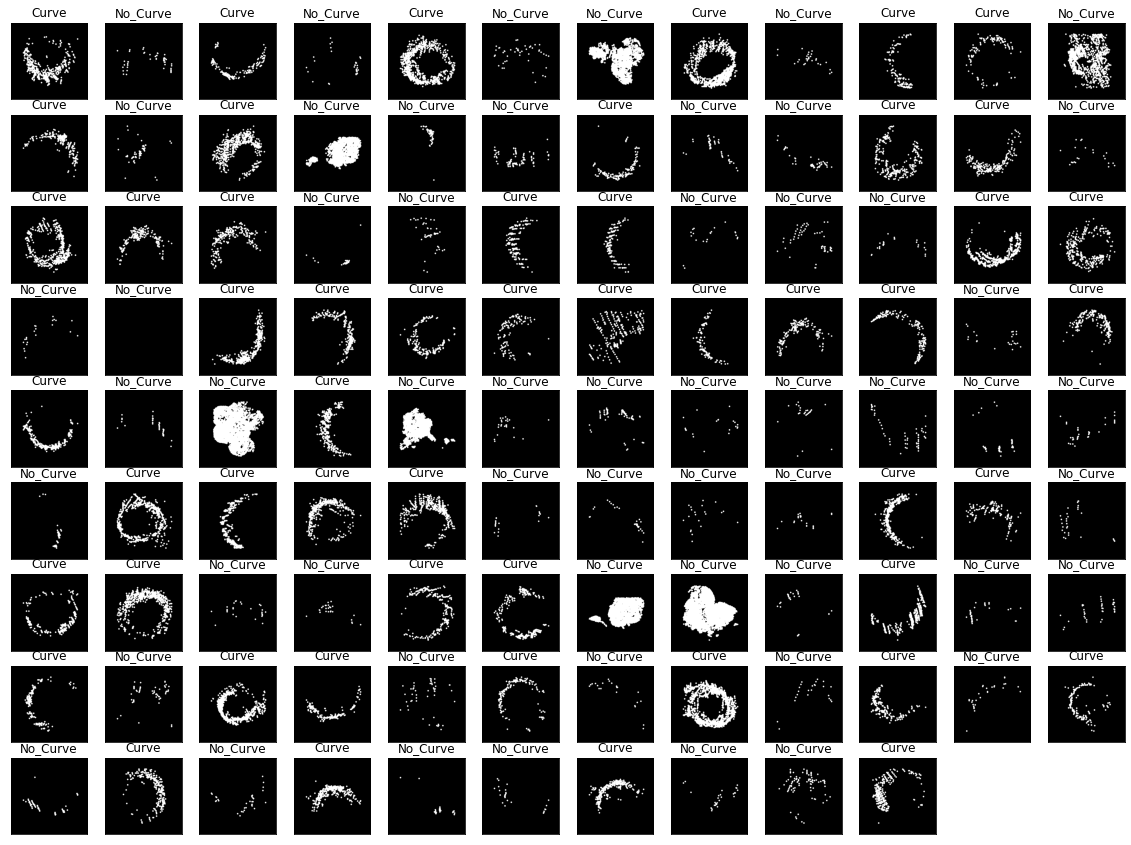

In [18]:
fig = plt.figure(figsize=(20, 20))

k = 0
for img  in test_image:
    
    y = fig.add_subplot(12,12,k+1)
    k += 1
    data = img.reshape(1,256,256,1)
    model_out = model.predict([data])
    
    
    if np.argmax(model_out) == 1:
        str_label = "Curve"
    else:
        str_label = "No_Curve"
    
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

1/1 [==============================] - 0s 16ms/step


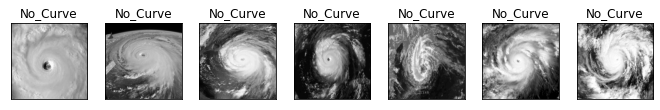

In [22]:
fig = plt.figure(figsize=(20, 20))

k = 0
for img  in test_hurr:
    
    y = fig.add_subplot(12,12,k+1)
    k += 1
    data = img.reshape(1,256,256,1)
    model_out = model.predict([data])
    
    
    if np.argmax(model_out) == 1:
        str_label = "Curve"
    else:
        str_label = "No_Curve"
    
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [ ]:
test_it = []
img1 = cv2.imread(os.path.join(data_dir,"test1.png"), cv2.IMREAD_GRAYSCALE)
test_it.append([np.array(img1)])

img2 = cv2.imread(os.path.join(data_dir,"test2.png"), cv2.IMREAD_GRAYSCALE)
test_it.append([np.array(img2)])

img3 = cv2.imread(os.path.join(data_dir,"test4.png"), cv2.IMREAD_GRAYSCALE)
test_it.append([np.array(img3)])


test_it = np.array(test_it)
print(test_it)

fig = plt.figure(figsize=(20, 20))
k=0
for img in test_it:
    y = fig.add_subplot(11, 11, k+1)
    data = cv2.resize(img, (256, 256))
    
    prediction = model.predict([data])
    if(np.argmax(prediction) == 1):
        str_label = "Curve"
    else:
        str_label = "No_Curve"
    
    k+=1
#     y.imshow(img, cmp="gray")
#     plt.title(str_label)
    
#     y.axes.get_xaxes().set_visible(False)
#     y.axes.get_yaxes().set_visible(False)

In [ ]:
test_image

In [ ]:
test_it

In [ ]:
y = fig.add_subplot(10, 10, k+1)

prediction = model.predict([img2])
if(np.argmax(prediction) == 1):
    str_label = "Curve"
else:
    str_label = "No_Curve"

k+=1
y.imshow(img2, cmp="gray")
plt.title(str_label)

y.axes.get_xaxes()
y.axes.get_yaxes() 

In [23]:
from PIL import Image, ImageFilter

In [25]:
image = Image.open(f"1.png")
image = image.convert("L")
# image.show()
image = image.filter(ImageFilter.FIND_EDGES)
image.show()